In [118]:
import pandas as pd
import mygene
import gseapy as gp

In [119]:
results_dir = "DESeq2/results"

## Cluster 0 Genes

In [ ]:
cluster0File = f"{results_dir}/cluster_0_vs_rest/sig_genes.csv"
cluster0Sig = pd.read_csv(cluster0File)
# all upregulated genes have logFoldChange>0
upregulated0 = list(cluster0Sig[cluster0Sig["log2FoldChange"]>0]["Unnamed: 0"])

In [ ]:
# Gene names
mg = mygene.MyGeneInfo()
# Remove version numbers
gene_ids = [gid.split('.')[0] for gid in upregulated0]

# Query mygene.info to get gene name from id
results = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name_upregulated0 = {entry['query']: entry.get('symbol', None) for entry in results}

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found no hit:	['ENSG00000283907', 'ENSG00000269028', 'ENSG00000275216', 'ENSG00000260581']


In [186]:
df = pd.DataFrame(list(id_to_name_upregulated0.items()), columns=['id', 'name'])
df = df[~df["name"].isna()]
df

,id,name
0,ENSG00000228253,ATP8
1,ENSG00000247627,MTND4P12
2,ENSG00000200534,SNORA33
3,ENSG00000210140,TRNC
4,ENSG00000207175,RNU1-67P
...,...,...
386,ENSG00000253338,IGLV3-29
387,ENSG00000250682,LINC00491
388,ENSG00000069482,GAL
389,ENSG00000173702,MUC13


In [187]:
upregulated0_gene_names = list(df.name)
len(upregulated0_gene_names)

346

### GO Analysis

In [192]:
enr_0 = gp.enrichr(gene_list=upregulated0_gene_names,
                 gene_sets=['GO_Biological_Process_2021', 'KEGG_2021_Human'],
                 organism='Human',
                 outdir='enrichment_results',
                 cutoff=0.05,
                no_plot=True)

In [193]:
enr_0.results.sort_values("Adjusted P-value").head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1086,KEGG_2021_Human,Aminoacyl-tRNA biosynthesis,10/66,1.084545e-07,0.000015,0,0,11.086121,177.787410,TRNF;TRNV;TRNL1;TRNT;TRNC;TRNP;TRNS2;TRNM;TRNY...
0,GO_Biological_Process_2021,O-glycan processing (GO:0016266),7/61,5.878940e-05,0.063845,0,0,7.972832,77.667732,GALNT13;MUC16;MUC13;MUC5B;MUC3A;MUC4;MUC5AC
1,GO_Biological_Process_2021,epithelial structure maintenance (GO:0010669),4/18,1.770068e-04,0.064076,0,0,17.444543,150.709036,VSIG1;MUC13;TFF1;MUC4
2,GO_Biological_Process_2021,maintenance of gastrointestinal epithelium (GO...,4/18,1.770068e-04,0.064076,0,0,17.444543,150.709036,VSIG1;MUC13;TFF1;MUC4
3,GO_Biological_Process_2021,protein O-linked glycosylation (GO:0006493),7/102,1.410633e-03,0.382987,0,0,4.522455,29.684114,GALNT13;MUC16;MUC13;MUC5B;MUC3A;MUC4;MUC5AC
224,GO_Biological_Process_2021,morphogenesis of an epithelial sheet (GO:0002011),1/10,1.515804e-01,0.723606,0,0,6.723077,12.684021,BMP7
223,GO_Biological_Process_2021,SNARE complex assembly (GO:0035493),1/10,1.515804e-01,0.723606,0,0,6.723077,12.684021,VAMP2
222,GO_Biological_Process_2021,inner ear receptor cell stereocilium organizat...,1/10,1.515804e-01,0.723606,0,0,6.723077,12.684021,USH1C
221,GO_Biological_Process_2021,hematopoietic stem cell differentiation (GO:00...,1/10,1.515804e-01,0.723606,0,0,6.723077,12.684021,SFRP1
220,GO_Biological_Process_2021,regulation of tau-protein kinase activity (GO:...,1/10,1.515804e-01,0.723606,0,0,6.723077,12.684021,DKK1


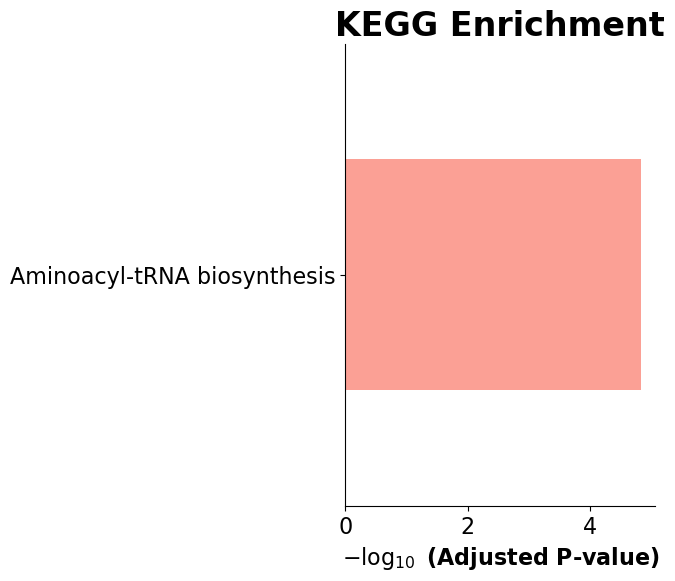

In [194]:
# Filtering to KEGG-only results to plot
kegg_results = enr_0.results[enr_0.results["Gene_set"] == "KEGG_2021_Human"]

# Plotting only significant terms
if (kegg_results["Adjusted P-value"] <= 0.05).any():
    gp.barplot(kegg_results, title="KEGG Enrichment", cutoff=0.05)
else:
    print("No KEGG terms pass the cutoff.")

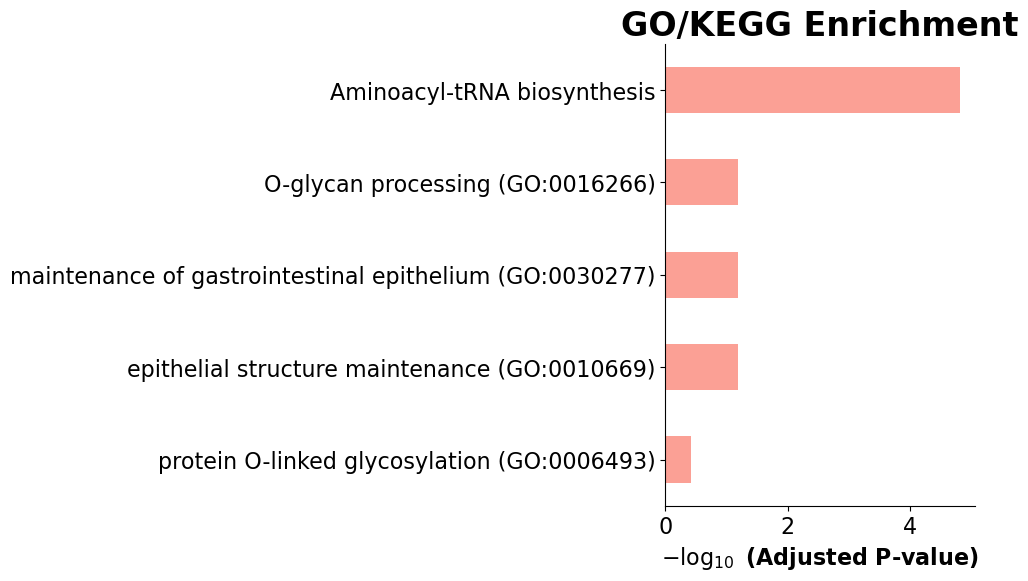

In [ ]:
if (enr_0.results["Adjusted P-value"] <= 0.5).any():
    gp.barplot(enr_0.results, title="GO/KEGG Enrichment", cutoff=0.5)
else:
    print("No terms pass the cutoff.")

In [132]:
enr_0.results[enr_0.results["Term"] == "Aminoacyl-tRNA biosynthesis"]["Genes"]

1086    TRNF;TRNV;TRNL1;TRNT;TRNC;TRNP;TRNS2;TRNM;TRNY...
Name: Genes, dtype: object

## Cluster 1 genes

In [ ]:
cluster1File = f"{results_dir}/cluster_1_vs_rest/sig_genes.csv"
cluster1Sig = pd.read_csv(cluster1File)
# all upregulated genes have logFoldChange>0
upregulated1 = list(cluster1Sig[cluster1Sig["log2FoldChange"]>0]["Unnamed: 0"])

In [ ]:
# Gene names
mg = mygene.MyGeneInfo()
# Remove version numbers
gene_ids = [gid.split('.')[0] for gid in upregulated1]

# Query mygene.info to get gene names
results = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name_upregulated1 = {entry['query']: entry.get('symbol', None) for entry in results}

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
6 input query terms found no hit:	['ENSG00000283907', 'ENSG00000269028', 'ENSG00000275216', 'ENSG00000248103', 'ENSG00000260581', 'ENS


In [198]:
df = pd.DataFrame(list(id_to_name_upregulated1.items()), columns=['id', 'name'])
df = df[~df["name"].isna()]
df

,id,name
0,ENSG00000228253,ATP8
1,ENSG00000247627,MTND4P12
2,ENSG00000200534,SNORA33
3,ENSG00000210140,TRNC
4,ENSG00000207175,RNU1-67P
...,...,...
469,ENSG00000162344,FGF19
470,ENSG00000179083,FAM133A
471,ENSG00000200521,Y_RNA
472,ENSG00000283615,MIR924


In [199]:
upregulated1_gene_names = list(df.name)
len(upregulated1_gene_names)

418

### GO Analysis

In [201]:
enr_1 = gp.enrichr(gene_list=upregulated1_gene_names,
                 gene_sets=['GO_Biological_Process_2021', 'KEGG_2021_Human'],
                 organism='Human',
                 outdir='enrichment_results',
                 cutoff=0.05,
                no_plot=True)

In [202]:
enr_1.results.sort_values("Adjusted P-value").head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1347,KEGG_2021_Human,Aminoacyl-tRNA biosynthesis,10/66,7.281341e-07,0.000114,0,0,8.925374,126.140360,TRNF;TRNV;TRNL1;TRNT;TRNC;TRNP;TRNS2;TRNM;TRNY...
2,GO_Biological_Process_2021,thyroid gland development (GO:0030878),3/8,4.156551e-04,0.186629,0,0,29.538693,229.978071,TBX1;FOXE1;NKX2-5
0,GO_Biological_Process_2021,epithelial structure maintenance (GO:0010669),4/18,3.897987e-04,0.186629,0,0,14.094998,110.644046,VSIG1;TFF2;TFF1;MUC4
1,GO_Biological_Process_2021,maintenance of gastrointestinal epithelium (GO...,4/18,3.897987e-04,0.186629,0,0,14.094998,110.644046,VSIG1;TFF2;TFF1;MUC4
3,GO_Biological_Process_2021,ear morphogenesis (GO:0042471),4/23,1.042097e-03,0.258994,0,0,10.383137,71.296022,TBX1;TFAP2A;USH1C;HOXA1
4,GO_Biological_Process_2021,endocrine system development (GO:0035270),4/24,1.230902e-03,0.258994,0,0,9.863476,66.085372,TBX1;SOX2;FOXE1;NKX2-5
5,GO_Biological_Process_2021,inner ear morphogenesis (GO:0042472),4/24,1.230902e-03,0.258994,0,0,9.863476,66.085372,TBX1;TFAP2A;USH1C;HOXA1
6,GO_Biological_Process_2021,O-glycan processing (GO:0016266),6/61,1.370818e-03,0.258994,0,0,5.397652,35.583202,GALNT13;MUC16;MUC5B;MUC3A;MUC4;MUC5AC
7,GO_Biological_Process_2021,regulation of nucleobase-containing compound m...,3/12,1.538199e-03,0.258994,0,0,16.407035,106.270716,IGF2BP1;IGF2BP3;IGF2BP2
8,GO_Biological_Process_2021,embryonic organ morphogenesis (GO:0048562),5/44,1.804453e-03,0.270066,0,0,6.332556,40.005910,FBN2;TBX1;FOXE1;RBPMS2;HOXC9


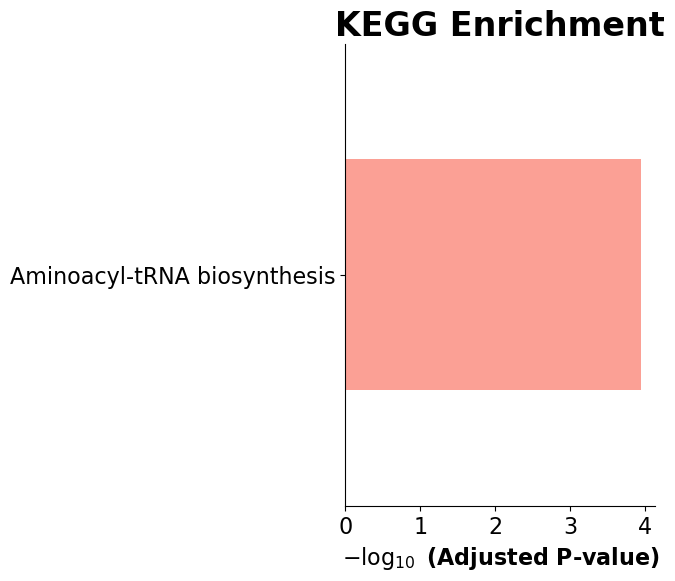

In [203]:
# Filtering to KEGG-only results to plot
kegg_results = enr_1.results[enr_1.results["Gene_set"] == "KEGG_2021_Human"]

# Plotting only significant terms
if (kegg_results["Adjusted P-value"] <= 0.05).any():
    gp.barplot(kegg_results, title="KEGG Enrichment", cutoff=0.05)
else:
    print("No KEGG terms pass the cutoff.")

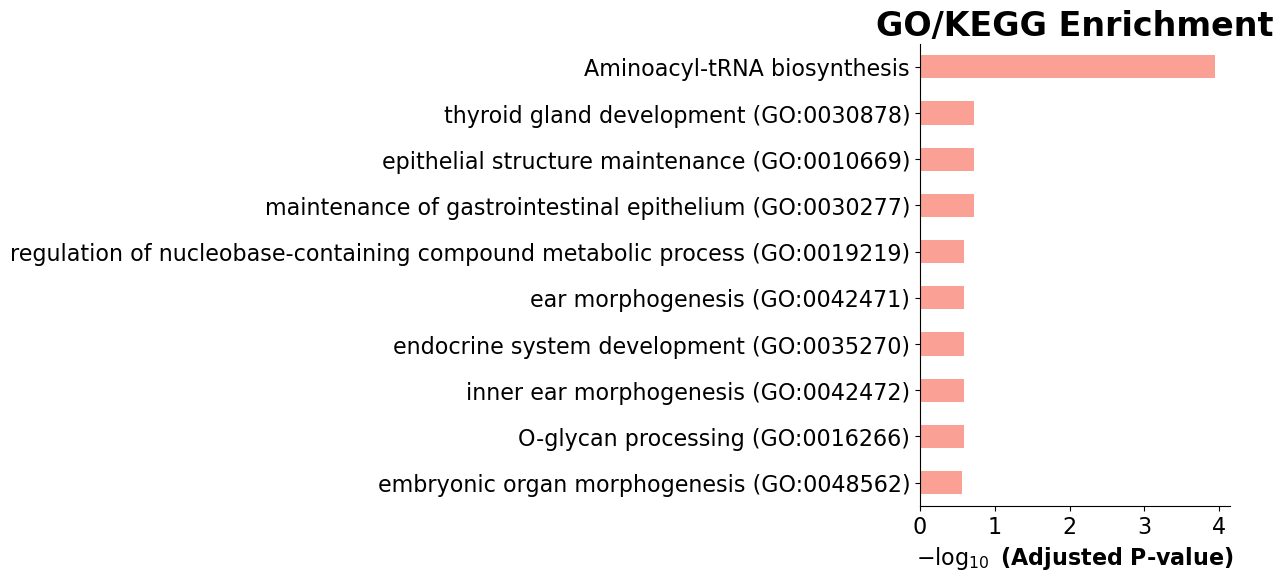

In [ ]:
if (enr_1.results["Adjusted P-value"] <= 0.5).any():
    gp.barplot(enr_1.results, title="GO/KEGG Enrichment", cutoff=0.5)
else:
    print("No terms pass the cutoff.")

In [145]:
enr_1.results[enr_1.results["Term"] == "Aminoacyl-tRNA biosynthesis"]["Genes"]

1347    TRNF;TRNV;TRNL1;TRNT;TRNC;TRNP;TRNS2;TRNM;TRNY...
Name: Genes, dtype: object

### Upregulated

## Cluster 2 genes

In [ ]:
cluster2File = f"{results_dir}/cluster_2_vs_rest/sig_genes.csv"
cluster2Sig = pd.read_csv(cluster2File)
# all upregulated genes have logFoldChange>0
upregulated2 = list(cluster2Sig[cluster2Sig["log2FoldChange"]>0]["Unnamed: 0"])

In [ ]:
# Gene names
mg = mygene.MyGeneInfo()
# Remove version numbers
gene_ids = [gid.split('.')[0] for gid in upregulated2]

# Query mygene.info to get gene names
results = mg.querymany(gene_ids, scopes='ensembl.gene', fields='symbol', species='human')

# Build dictionary
id_to_name_upregulated2 = {entry['query']: entry.get('symbol', None) for entry in results}

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
5 input query terms found no hit:	['ENSG00000283907', 'ENSG00000269028', 'ENSG00000275216', 'ENSG00000260581', 'ENSG00000231566']


In [207]:
df = pd.DataFrame(list(id_to_name_upregulated2.items()), columns=['id', 'name'])
df = df[~df["name"].isna()]
df

,id,name
0,ENSG00000228253,ATP8
1,ENSG00000247627,MTND4P12
2,ENSG00000200534,SNORA33
3,ENSG00000210140,TRNC
4,ENSG00000207175,RNU1-67P
...,...,...
433,ENSG00000277919,MIR8067
434,ENSG00000205420,KRT6A
435,ENSG00000159527,PGLYRP3
436,ENSG00000108602,ALDH3A1


In [208]:
upregulated2_gene_names = list(df.name)
len(upregulated2_gene_names)

386

## GO Analysis

In [209]:
enr_2 = gp.enrichr(gene_list=upregulated2_gene_names,
                 gene_sets=['GO_Biological_Process_2021', 'KEGG_2021_Human'],
                 organism='Human',
                 outdir='enrichment_results',
                 cutoff=0.05,
                no_plot=True)

In [210]:
enr_2.results.sort_values("Adjusted P-value").head(10)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1168,KEGG_2021_Human,Aminoacyl-tRNA biosynthesis,10/66,3.241947e-07,0.000045,0,0,9.792417,146.317527,TRNF;TRNV;TRNL1;TRNT;TRNC;TRNP;TRNS2;TRNM;TRNY...
0,GO_Biological_Process_2021,O-glycan processing (GO:0016266),7/61,1.231489e-04,0.108385,0,0,7.050051,63.465386,GALNT13;MUC16;MUC13;MUC5B;MUC3A;MUC4;MUC5AC
1,GO_Biological_Process_2021,epithelial structure maintenance (GO:0010669),4/18,2.783865e-04,0.108385,0,0,15.441952,126.415542,VSIG1;MUC13;TFF1;MUC4
2,GO_Biological_Process_2021,maintenance of gastrointestinal epithelium (GO...,4/18,2.783865e-04,0.108385,0,0,15.441952,126.415542,VSIG1;MUC13;TFF1;MUC4
3,GO_Biological_Process_2021,positive regulation of epithelial cell prolife...,8/123,1.967169e-03,0.540157,0,0,3.782100,23.566869,MMP12;TCF7L2;SFRP1;EPGN;TGFA;NRARP;SCG2;CCL26
4,GO_Biological_Process_2021,protein O-linked glycosylation (GO:0006493),7/102,2.750220e-03,0.540157,0,0,3.999006,23.578436,GALNT13;MUC16;MUC13;MUC5B;MUC3A;MUC4;MUC5AC
5,GO_Biological_Process_2021,cellular response to vitamin D (GO:0071305),2/5,3.237243e-03,0.540157,0,0,35.853881,205.551490,SFRP1;CYP24A1
6,GO_Biological_Process_2021,fatty acid omega-oxidation (GO:0010430),2/5,3.237243e-03,0.540157,0,0,35.853881,205.551490,CYP24A1;ADH7
248,GO_Biological_Process_2021,regulation of tau-protein kinase activity (GO:...,1/10,1.691002e-01,0.765926,0,0,5.957498,10.588046,DKK1
249,GO_Biological_Process_2021,hematopoietic stem cell differentiation (GO:00...,1/10,1.691002e-01,0.765926,0,0,5.957498,10.588046,SFRP1


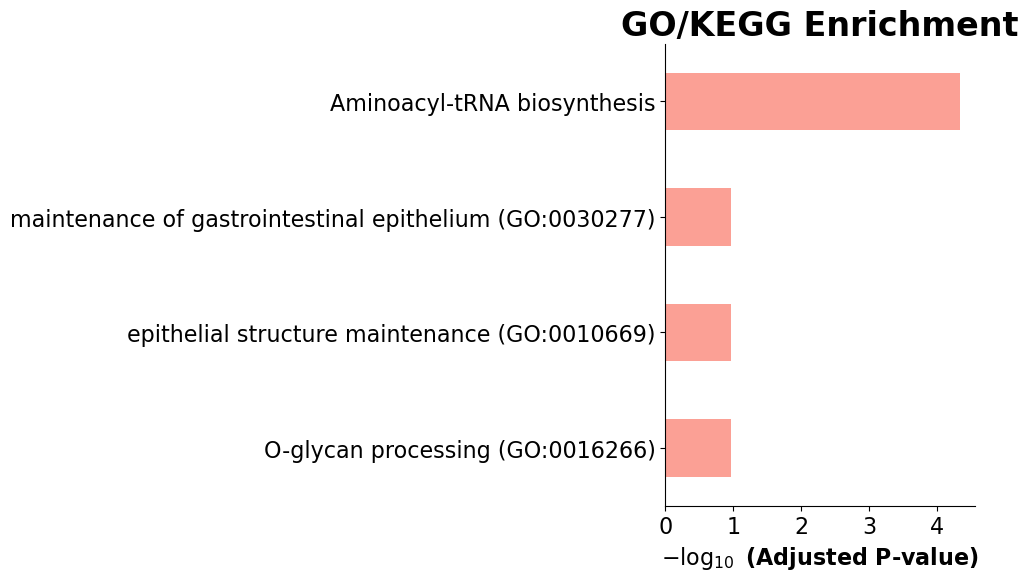

In [ ]:
# Filtering to KEGG-only results to plot
#kegg_results = enr_2.results[enr_2.results["Gene_set"] == "KEGG_2021_Human"]

# Plotting only significant terms
if (enr_2.results["Adjusted P-value"] <= 0.5).any():
    gp.barplot(enr_2.results, title="GO/KEGG Enrichment", cutoff=0.5)
else:
    print("No terms pass the cutoff.")

In [89]:
enr_2.results[enr_2.results["Term"] == "Aminoacyl-tRNA biosynthesis"]["Genes"]

1712    TRNF;TRNV;TRNL1;TRNT;TRNC;TRNS2;TRNM;TRNY;TRNH
Name: Genes, dtype: object

In [68]:
len(set(upregulated1_gene_names))

369

In [69]:
len(set(upregulated0_gene_names))

432